In [284]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.svm import LinearSVR
from sklearn_rvm import EMRVR
from math import *
import gc
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.metrics import normalized_mutual_info_score
from collections import Counter
from sklearn.metrics.cluster import v_measure_score


In [78]:
dataset_name = "CAT12_VBM_features_Quasi_Raw_features_RFF_Transform_openbhb_train_dataset"
data = "row_100"

# train_set_name = "reduced_kernel_trick_openbhb_train_set_500_components"
# test_set_name = "reduced_kernel_trick_openbhb_val_set_500_components"

# # MRI_data = np.array(pd.read_csv("/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/" + dataset_name + ".csv", header=None, usecols=np.arange(1,1797)))
# X = np.load("/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/Reduced_matrices_openbhb/" + dataset_name + ".npy")
# X_test = np.array(pd.read_csv("/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/Reduced_matrices_openbhb/" + test_set_name + ".csv", usecols=np.arange(1,501)))
X = np.loadtxt(open("/media/dataanalyticlab/Drive2/MANSOOR/" + data + ".csv"), delimiter=",", usecols=np.arange(1,3659573))

sub_metadata = np.array(pd.read_csv('/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/Subjects/openbhb_sub_metadata_k-means_cluster.csv'))
Y = sub_metadata[:, 2]
y_3_classes = sub_metadata[:,4]
y_4_classes = sub_metadata[:,6]
y_5_classes = sub_metadata[:,8]
y_6_classes = sub_metadata[:,10]
y_7_classes = sub_metadata[:,12]
y_8_classes = sub_metadata[:,14]



In [282]:
# Feature Scaling

# sc = StandardScaler()
# X_sc = sc.fit_transform(X)
# # X_test = sc.transform(X_test)
# del X
gc.collect()

2747

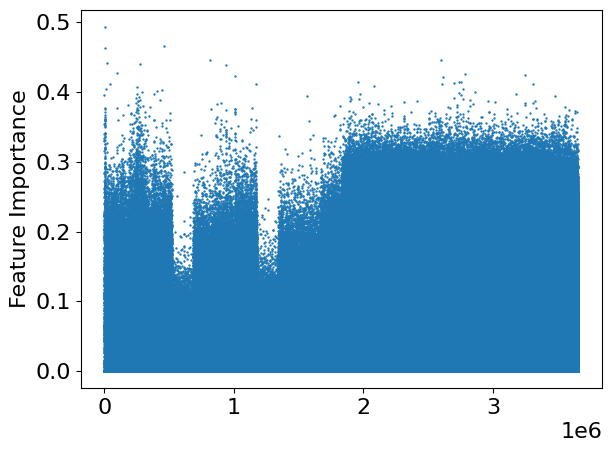

In [287]:
importances = mutual_info_regression(X_sc,Y[:100,])
name = "100r_train_openbhb"
PlotFeatureImportances(importances, name)

In [286]:
def PlotFeatureImportances(importances, name):
    plt.rcParams.update({'font.size': 16})
    plt.scatter([x for x in range(len(importances))], importances, s=0.5)
    # plt.xlabel("Features")
    plt.ylabel("Feature Importance")
    plt.tight_layout()
    # plt.savefig("/media/dataanalyticlab/Drive2/MANSOOR/Figures/Feature_importances/" + str(name)+str("_feat_imp.png"))
    

In [289]:
mean_x = []
std_x = []
median = []
min_x = []
max_x = []
cov_xy = []
corr_xy = []
MI = []
NMI_score = []

mu_y = np.mean(Y[:,])
std_y = np.std(Y[:,])


In [221]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
# X_test = sc.transform(X_test)

In [287]:
###### Voxel intensity features are specified as discrete features  #####
# comparison of MI of voxel (CAT12 VBM) features as discrete and continuous random variable

MI_discrete = mutual_info_regression(X[:,500000].reshape(-1,1),Y[:100,], discrete_features=True)
print("MI Discrete: ", MI_discrete)
MI_continuous = mutual_info_regression(X[:,500000].reshape(-1,1),Y[:100,])
print("MI Continuous: ",MI_continuous)


# comparison of MI of voxel (Quasi-Raw) features as discrete and continuous random variable

MI_disc = mutual_info_regression(X[:,3000000].reshape(-1,1),Y[:100,], discrete_features=False)
print("MI Discrete: ", MI_disc)
MI_cont = mutual_info_regression(X[:,3000000].reshape(-1,1),Y[:100,])
print("MI Continuous: ",MI_cont)


######### Normalized MI ###########
NMI = normalized_mutual_info_score( X[:,500000], Y[:100,])
NMI_cal = MI_continuous/np.mean([entropy(X[:,500000]), entropy(Y[:100,])])
print("Normalized MI: ", NMI)
print("Calculated NMI: ", NMI_cal)

MI Discrete:  [0.51587838]
MI Continuous:  [0.09372616]
MI Discrete:  [0.14279978]
MI Continuous:  [0.13863311]
Normalized MI:  0.8015770606147967
Calculated NMI:  [0.01700879]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and unknown values for target
  warnings.warn(msg, UserWarning)


In [290]:
# compute covariance between x and y
def comp_cov(x, y, m1, m2):
    return sum([(xi - m1) * (yi - m2) for xi, yi in zip(x, y)]) / (len(x))

In [235]:

for i in range(0, len(X.transpose())):
    mu_x = np.mean(X[:,i])  # compute mean (x_i)
    mean_x.append(mu_x)
    st_x = np.std(X[:,i])  # compute std(x_i)
    std_x.append(st_x)
    min_x.append(np.min(X[:,i]))  # find min(x_i)
    max_x.append(np.max(X[:,i]))   # find max (x_i)
    cov = comp_cov(X[:,i], Y[:,], mu_x, mu_y)   # compute covariance(x_i, y)
    cov_xy.append(cov)
    if st_x != 0:
        corr_xy.append(cov/(st_x * std_y))       # compute correlation(x_i, y)
    else:
        corr_xy.append(0)
    
    # Mutual Information computing the statistical dependence b/w X and Y
    MI.append(mutual_info_regression(X[:,i].reshape(-1,1),Y[:,], discrete_features=True))
    # Normalized Mutual Information Score (b/w 0 and 1)
    # NMI = MI(X,Y)/mean{H(X), H(Y)}
    NMI_score.append(normalized_mutual_info_score(X[:,i], Y[:,]))
    
    

In [236]:
mean = pd.Series(mean_x)
std = pd.Series(std_x)
# median = pd.Series(median)
min = pd.Series(min_x)
max = pd.Series(max_x)
cov = pd.Series(cov_xy)
corr = pd.Series(corr_xy)
MI = pd.Series(MI)
NMI = pd.Series(NMI)

Feature_metrics = pd.DataFrame({"Mean (x)": mean, "Std (x)": std, 
 "Min (x)": min, "Max (x)": max, "Cov(x,y)": cov, "Corr (x,y)": corr,
  "MI(x,y)": MI, "NMI(x,y)": NMI})

 # return a 3659572 x 8 matrix (n x 8)

 

In [248]:
######## Here are some of the attempts that I made to compute IG  #######



y = Y.astype(int).reshape(-1,1)
y = np.array(map(str, Y)).reshape(-1,1)

In [79]:
y1 = pd.Series(y_3_classes)

y1= y1.replace(to_replace=[0, 1,2], value=["zero", "one", "two"])
y1 = y1.astype(str)
print(y1.dtype)

object


In [92]:
# file = np.load("/home/dataanalyticlab/Desktop/ROI_features_pca_openbhb_train.npy")

file = np.concatenate((X[:,:2000], np.array(y1[:100,]).reshape(-1,1)), axis=1)
a = pd.DataFrame(file)
a.to_csv("/home/dataanalyticlab/Desktop/ROI_features_pca_openbhb_train.csv", header=None)
# # np.savetxt("/home/dataanalyticlab/Desktop/ROI_features_pca_openbhb_train.csv", file, delimiter=",")

In [96]:

def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

In [173]:
IG_collection = []
for i in range(1,10):
    IG_collection.append(information_gain(Y, X[:,i]))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [35]:
# def information_gain(x, y):

#     def _entropy(values):
#         counts = np.bincount(values)
#         probs = counts[np.nonzero(counts)] / float(len(values))
#         return - np.sum(probs * np.log(probs))

#     def _information_gain(feature, y):
#         feature_set_indices = np.nonzero(feature)[1]
#         feature_not_set_indices = [i for i in feature_range if i not in feature_set_indices]
#         entropy_x_set = _entropy(y[feature_set_indices])
#         entropy_x_not_set = _entropy(y[feature_not_set_indices])

#         return entropy_before - (((len(feature_set_indices) / float(feature_size)) * entropy_x_set)
#                                  + ((len(feature_not_set_indices) / float(feature_size)) * entropy_x_not_set))

#     feature_size = x.shape[1]
#     feature_range = range(0, feature_size)
#     entropy_before = _entropy(y)
#     information_gain_scores = []

#     for feature in x.T:
#         information_gain_scores.append(_information_gain(feature, y))
#     return information_gain_scores, []

In [ ]:
IG = information_gain(X,y1)

In [94]:
feature_size = X[:,:2000].shape[0]
feature_range = range(0, feature_size)
entropy_before = entropy(y_3_classes)
information_gain_scores = []

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

In [97]:
# def entropy(values):
#     counts = np.bincount(values)
#     probs = counts[np.nonzero(counts)] / float(len(values))
#     return - np.sum(probs * np.log(probs))

In [98]:
# def information_gain(feature, y):
#     feature_set_indices = np.nonzero(feature)[0]
#     feature_not_set_indices = [i for i in feature_range if i not in feature_set_indices]
#     entropy_x_set = entropy(y[feature_set_indices])
#     entropy_x_not_set = entropy(y[feature_not_set_indices])

#     return entropy_before - (((len(feature_set_indices) / float(feature_size)) * entropy_x_set)
#                                 + ((len(feature_not_set_indices) / float(feature_size)) * entropy_x_not_set))

In [56]:
for feature in X.T:
    information_gain_scores.append(information_gain(feature, y1))

In [25]:
feature_set_indices = np.nonzero(feature)[0]
feature_not_set_indices = [i for i in feature_range if i not in feature_set_indices]
entropy_x_set = entropy(y[feature_set_indices])
entropy_x_not_set = entropy(y[feature_not_set_indices])

In [26]:
ent = (((len(feature_set_indices) / float(feature_size)) * entropy_x_set)
                                + ((len(feature_not_set_indices) / float(feature_size)) * entropy_x_not_set))

In [ ]:
for xi,yi in zip(X,y):
    um_d = len(y)
    num_ck = {}
    num_fi_ck = {}
    num_nfi_ck = {}
    num_ck[yi] = num_ck.get(yi,0)+1
    for index,xii in enumerate(xi):
        print(index, xii)
        if index not in num_fi_ck:
            num_fi_ck[index] = {}
            num_nfi_ck[index] = {}  
        if not xii==0:
            num_fi_ck[index][yi] = num_fi_ck[index].get(yi)+1

In [204]:
x = num_fi_ck[index].get(yi)
print(x)

None


In [208]:
def info_gain(x,y,k=None):
    num_d = len(y)
    num_ck = {}
    num_fi_ck = {}
    num_nfi_ck = {}
    for xi,yi in zip(x,y):
        num_ck[yi] = num_ck.get(yi,0)+1
        for index,xii in enumerate(xi):
            if index not in num_fi_ck:
                num_fi_ck[index] = {}
                num_nfi_ck[index] = {}    
            if yi not in num_fi_ck:
                num_fi_ck[index][yi] = 0
                num_nfi_ck[index][yi] = 0
            if not xii==0:
                num_fi_ck[index][yi] = num_fi_ck[index].get(yi)
            else:
                num_nfi_ck[index][yi] = num_nfi_ck[index].get(yi)
    num_fi = {}
    for fi,dic in num_fi_ck.items():
        num_fi[fi] = sum(dic.values())
    num_nfi = dict([(fi,num_d-num) for fi,num in num_fi.items()])
    HD = 0
    for ck,num in num_ck.items():
        p = float(num)/num_d
        HD = HD-p*math.log(p,2)
    IG = {}
    for fi in num_fi_ck.keys():
        POS = 0
        for yi,num in num_fi_ck[fi].items():
            p = (float(num)+0.0001)/(num_fi[fi]+0.0001*len(dic))
            POS = POS - p*math.log(p,2)
        
        NEG = 0
        for yi,num in num_nfi_ck[fi].items():
            p = (float(num)+0.0001)/(num_nfi[fi]+0.0001*len(dic))
            NEG = NEG - p*math.log(p,2)
        p = float(num_fi[fi])/num_d
        IG[fi] = round(HD - p*POS - (1-p)*NEG,4)
    IG = sorted(IG.items(),key=lambda d:d[1],reverse=True)
    if k==None:
        return IG
    else:
        return IG[0:k]



In [192]:
def red(x,IG):
    feature = dict.fromkeys([fi for fi,v in IG])
    newx = []
    for xi in x:
        newrow = []
        for index,xii in enumerate(xi):
            if feature.has_key(index):
                newrow.append(xii)
        newx.append(newrow)
    return newx

In [ ]:
IG = info_gain(X, y, k=2)

In [139]:
def total(values):
    """
    arguments:
    values -> array or tuple of numbers
    return:
    sum of the values from the argument array
    """
    # something like (1, 2). output is a single number, total sum
    return sum(values)

In [140]:
def entropy (vals):
    """
    Entropy for a decision. The average amount of information encoded by this branch.
    Total entropy is calculated by passing in the sum of goal states as a single tuple.
    arguments:
    vals - tuple, where each number represents a goal state classified by a branch of a decision
    return:
    e - entropy for the given branch
    """
    t = total(vals)
    e = 0 # 0 is returned by default if all vals are 0
    for val in vals:
        if val != 0:
            e -= (val / float(t))*log(val / float(t), 2)
    return e


In [141]:
def construct_total_tuple(values):
    """
    Takes a tuple, and adds all positions together.
    This represents the total number of values in the data set
    values - [(0, 1, 1) (1, 2, 1) (0, 2, 3)]
    Return - (1, 5, 5)
    """
    # *values tells zip to "unzip" what was provided
    # e.g. zip(*[(0, 1, 1) (1, 2, 1) (0, 2, 3)]) --> [(0, 1, 0) (1, 2, 2) (1, 1, 3)]
    return tuple(map(sum, zip(*values)))

In [145]:
class InformationGain:

    def __init__(self, attributes):
        """
        Constructs an instance of entropy_calculator
        aruguments:
        attributes - dict() values: [(),...]: Dictionary that represents decision attributes (keys) and the goal state values
        e.g. attributes = {"Outlook": [(2, 3), (4, 0), (3, 2)], "Temp": [(2, 2), (4, 2), (3, 1)], "Humidity": [(3, 4), (6, 1)], "Wind": [(6, 2), (3, 3)]}
        Outlook decision has 3 branches: sunny (2 yes, 3 no), overcast (4 yes, 0 no), rainy (3 yes, 2 no)
        If there are more than 3 goal states (i.e. Yes, No, and Maybe) all tuples should be of length 3.
        If there are no entries of one of the goal states in a particular branch, just leave it as 0.
        """
        self.attributes = attributes
        vals = attributes.values()[0]
        self.total_tuple = construct_total_tuple(vals)
        self.total_entries = total(self.total_tuple)

    def __entropy_remainder(self, branches):
        """
        Calculates the entropy remainder from each branch.
        arguments:
        self - class instance
        branches [(),()] - the branches for a decision, with goal values formatted as array of tuples
        return:
        full_remainder -the amount of information encoded in this decision (smaller is better)
        """
        full_remainder = 0
        for branch in branches:
            rem = [(float(value) / self.total_entries) * entropy(branch) for value in branch]
            full_remainder += sum(rem)
        print("fullremainder is: {0}".format(full_remainder))
        return full_remainder


    def entropy_gain(self):
        """
        return the total amount of information gain for each attribute in the calculator
        Also referred to the toal reduction in entropy.
        Calculated by taking the total entropy, and subtracting the sum of the remainders for each decision branch in an attribute
        return:
        return_dict: dictionary of attribute keys and the amount of information encoded by each (larger is better)
        """
        return_dict = {}
        total_e = entropy(self.total_tuple)
        print(total_e)
        for k, v in self.attributes.items():
            rem = self.__entropy_remainder(v)
            return_dict[k] = total_e - rem
        return return_dict

    def gini_impurity(self, class_vector):
        """Compute the gini impurity for a list of classes.
        This is a measure of how often a randomly chosen element
        drawn from the class_vector would be incorrectly labeled
        if it was randomly labeled according to the distribution
        of the labels in the class_vector.
        It reaches its minimum at zero when all elements of class_vector
        belong to the same class.
        Args:
            class_vector (list(int)): Vector of classes given as 0 or 1.
        Returns:
            Floating point number representing the gini impurity.
        """
        classes = dict()
        for val in class_vector:
            if not classes.has_key(val):
                classes[val] = 1
            else:
                classes[val] += 1
        impurity = 0
        for k, v in classes.iteritems():
            positive = float(v) / len(class_vector)
            negative = 1 - positive
            impurity += (positive * negative)

        return impurity


    def gini_gain(self, previous_classes, current_classes):
        """Compute the gini impurity gain between the previous and current classes.
        Args:
            previous_classes (list(int)): Vector of classes given as 0 or 1.
            current_classes (list(list(int): A list of lists where each list has
                0 and 1 values).
        Returns:
            Floating point number representing the information gain.
        """
        total_impurity = self.gini_impurity(previous_classes)
        total_remainder = 0
        for branch in current_classes:
            gi_branch = self.gini_impurity(branch)
            # weighted sum of gini_impurity for each branch
            total_remainder += gi_branch * (len(branch) / len(previous_classes))

        return total_impurity - total_remainder

In [275]:
for level in x[0].unique():
    df_feature_level = x[x[0] == level]
    print(df_feature_level[1])
    # entropy_level = compute_impurity(df_feature_level, split_criterion)
    # entropy_list.append(round(entropy_level, 3))
    # weight_level = len(df_feature_level) / len(df)
    # weight_list.append(round(weight_level, 3))

0   -0.0632
Name: 1, dtype: float64
1    0.060443
Name: 1, dtype: float64
2   -0.034082
Name: 1, dtype: float64
3   -0.053909
Name: 1, dtype: float64
4   -0.048439
Name: 1, dtype: float64
5    0.03563
Name: 1, dtype: float64
6    0.062474
Name: 1, dtype: float64
7    0.060832
Name: 1, dtype: float64
8    0.008052
Name: 1, dtype: float64
9    0.060056
Name: 1, dtype: float64
10   -0.06318
Name: 1, dtype: float64
11   -0.058587
Name: 1, dtype: float64
12    0.044075
Name: 1, dtype: float64
13   -0.031954
Name: 1, dtype: float64
14    0.038638
Name: 1, dtype: float64
15   -0.046393
Name: 1, dtype: float64
16   -0.053694
Name: 1, dtype: float64
17   -0.002749
Name: 1, dtype: float64
18   -0.021084
Name: 1, dtype: float64
19   -0.001042
Name: 1, dtype: float64
20    0.01401
Name: 1, dtype: float64
21   -0.035472
Name: 1, dtype: float64
22   -0.053064
Name: 1, dtype: float64
23   -0.063244
Name: 1, dtype: float64
24   -0.054901
Name: 1, dtype: float64
25   -0.040577
Name: 1, dtype: float64
2

In [259]:
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """
    
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)

In [153]:
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    feature = pd.Series(feature)
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))



In [265]:
target_entropy = compute_impurity(x,"entropy")

In [263]:
split_criterion = 'entropy'
x = pd.DataFrame(X)
y = pd.Series(Y)
for feature in x:
    feature_info_gain = comp_feature_information_gain(x, y, feature, split_criterion)

target feature: 0       19.0
1       21.0
2       21.0
3       15.0
4       31.0
        ... 
3204    11.6
3205    60.0
3206    22.0
3207    21.0
3208    19.0
Length: 3209, dtype: object
descriptive_feature: 0
split criterion: entropy


KeyError: '[26.8528, 8.380561, 21.38261465, 15.92, 10.96712329, 27.5, 67.5, 35.51540041, 11.3369863, 22.5, 33.68651608, 11.52876712, 71.20602327, 9.7, 9.55890411, 32.5, 34.66666667, 24.31211499, 19.2, 60.53935661, 8.1013, 34.36550308, 33.51676934, 72.5, 10.8, 11.50718686, 25.12, 45.38809035, 8.90684932, 45.229295, 11.8, 34.47775496, 9.56438356, 17.79, 27.01437372, 12.8739726, 10.49, 69.28952772, 12.0411, 10.35342466, 60.10951403, 10.08, 16.2, 53.56605065, 14.2, 11.0739726, 24.34223135, 17.2, 59.89322382, 60.59685147, 24.83, 13.01369863, 50.02327173, 9.81917808, 7.126626, 28.34770705, 33.59342916, 62.08898015, 10.83, 28.3669, 41.82067077, 55.54004107, 52.5, 10.9, 10.3477, 61.78507871, 16.3943, 12.9391, 9.75, 64.64613279, 11.444, 11.17, 9.1, 30.00684463, 14.37, 30.67214237, 76.78028747, 17.1, 12.76, 30.17659138, 19.7591, 48.54757016, 60.46269678, 23.9, 10.53, 30.66, 56.8733744, 9.8, 13.30684932, 11.28493151, 65.85352498, 72.32580424, 23.34839151, 26.03, 45.77412731, 10.78082192, 78.20396988, 18.5818, 15.25, 21.22, 45.61533196, 11.8816, 11.1999, 6.685832, 13.66, 14.4, 16.1, 13.28, 41.20465435, 20.90896646, 8.46, 9.5, 62.5, 11.07, 14.41, 24.37508556, 9.82, 78.58453114, 11.14794521, 10.29589041, 9.64109589, 30.89390828, 31.13483915, 16.6, 63.40314853, 12.65753425, 13.5, 43.46064339, 13.35, 20.69815195, 27.38398357, 53.41273101, 10.4, 38.90212183, 17.13, 59.38124572, 8.9747, 9.4, 40.5284052, 68.50924025, 17.56, 19.5, 43.16221766, 42.5, 56.67624914, 56.96372348, 59.67145791, 13.1, 33.91649555, 13.8, 28.12046543, 61.48665298, 23.69883641, 38.7816564, 10.79, 8.062971, 12.66027397, 8.375086, 11.04109589, 10.29, 13.24931507, 36.47912389, 9.74520548, 12.16438356, 6.329911, 58.28062971, 7.76454483, 57.06776181, 41.12251882, 16.104, 41.51950719, 10.82, 25.01848049, 57.22108145, 67.53456537, 70.2477755, 8.58333333, 26.92950034, 8.39, 32.93634497, 12.3477, 30.41752225, 44.09308693, 57.5, 31.2827, 70.55989049, 40.81314168, 10.72, 27.4114, 66.37371663, 25.92744695, 8.91232877, 62.68035592, 61.58795346, 9.7201, 20.8, 10.63013699, 37.21013005, 11.67, 18.7379, 60.8678987, 8.7, 72.14510609, 56.2, 7.7502, 28.99657769, 74.63655031, 16.66, 24.62149213, 63.83572895, 11.66027397, 55.63586585, 63.66324435, 9.02191781, 53.32785763, 42.15195072, 69.54688569, 8.89863014, 54.74332649, 9.9, 11.323, 43.82477755, 81.94113621, 11.15890411, 11.95068493, 27.83572895, 63.24709103, 34.1, 41.62, 21.0979, 23.84668036, 18.75, 8.17808219, 72.13141684, 45.25667351, 68.26830938, 18.2, 16.9, 12.08, 41.2019165, 40.55578371, 23.03901437, 75.97262149, 53.53593429, 46.89664613, 68.12320329, 46.59000684, 70.50239562, 25.2128679, 9.3, 11.02465753, 46.00684463, 55.08829569, 17.5, 56.43805613, 9.15616438, 9.15, 78.07255305, 12.60547945, 41.88911704, 9.28219178, 29.2, 10.10958904, 48.10130048, 50.39561944, 69.27583847, 15.6, 55.58110883, 60.0164271, 15.75, 9.43561644, 11.55, 70.95140315, 36.21629021, 10.24109589, 65.25941136, 47.06913073, 15.28, 13.33, 39.39767283, 72.26557153, 58.83093771, 8.07, 10.44383562, 36.06023272, 10.95342466, 72.8843258, 41.229295, 8.50684932, 10.2218, 48.678987, 15.0253, 8.8739726, 11.8761, 73.54414784, 24.85420945, 9.7890411, 35.80013689, 50.52429843, 9.08333333, 62.06160164, 60.90622861, 59.12936345, 9.66575343, 44.20533881, 13.63, 11.85205479, 9.3149, 30.69952088, 9.12054795, 13.85, 20.51, 31.95619439, 8.3, 12.43835616, 8.94, 12.6489, 35.44695414, 63.18138261, 10.1, 8.74, 12.66, 9.30958904, 73.18275154, 23.71526352, 25.53045859, 59.22245038, 28.5065024, 44.91991786, 13.79726027, 21.33, 66.9486653, 75.93702943, 8.542094, 10.08767123, 10.41369863, 53.30595483, 10.2, 11.66, 16.03, 25.4072553, 58.04243669, 13.38, 44.02464066, 9.897, 11.09, 43.91786448, 66.90759754, 12.25, 25.24, 28.56125941, 12.04, 12.92, 9.39452055, 10.30410959, 10.87123288, 62.24503765, 9.7721, 12.9, 12.00547945, 19.08, 8.42, 9.05753425, 12.97, 12.36986301, 10.79726027, 17.8, 14.03, 62.73785079, 16.0986, 20.33, 9.783, 15.53, 10.67671233, 37.09787817, 31.85489391, 34.8227, 24.87611225, 41.30047912, 11.3, 52.66529774, 60.91991786, 33.24, 8.67, 71.66324435, 11.04931507, 9.25, 34.23682409, 52.88706366, 33.24024641, 8.898015, 54.21492129, 10.67, 15.91, 68.15058179, 44.2, 27.66, 10.11232877, 57.73853525, 62.09445585, 36.46817248, 67.11293634, 59.74264203, 17.36, 54.27789185, 29.7303217, 22.1081, 7.326489, 9.2081, 9.1752, 10.54246575, 59.68514716, 70.83641342, 37.82888433, 11.01643836, 11.84383562, 74.98973306, 11.7892, 27.3238, 14.8, 24.56947296, 8.33150685, 14.25, 12.73, 26.57905544, 12.70136986, 69.68925394, 12.42739726, 57.21013005, 8.82739726, 25.58521561, 8.94246575, 32.16974675, 15.7, 8.47123288, 28.61327858, 9.063, 75.8275154, 8.78356164, 23.2909, 15.1, 12.4298, 24.28473648, 9.63287671, 10.50136986, 24.6, 51.65776865, 64.26830938, 11.8109589, 11.76712329, 12.58, 37.5, 61.01574264, 12.51232877, 10.60273973, 11.72876712, 7.66, 26.98425736, 11.44657534, 8.82191781, 11.23013699, 79.41409993, 24.6543, 18.7, 15.2, 59.14852841, 9.37534247, 9.73, 8.92054794, 29.27857632, 48.25462012, 48.07939767, 13.75, 35.58, 19.33, 9.9548, 72.82683094, 26.87748118, 9.933, 54.19301848, 13.86447639, 38.77344285, 10.7529, 44.88158795, 10.69589041, 8.98356164, 41.7522245, 59.88227242, 9.1890411, 59.83572895, 20.9, 10.68767123, 31.37029432, 9.61369863, 12.30410959, 24.76386037, 10.37260274, 22.601, 12.68, 20.1670089, 37.69746749, 11.76164384, 14.42, 13.95, 9.68493151, 13.9, 28.87063655, 41.09514031, 17.83, 8.40821918, 30.0698152, 24.2611, 31.46064339, 56.93908282, 9.161, 66.33264887, 65.66735113, 12.4, 17.6, 28.15879535, 10.96, 29.9685, 83.45790554, 35.40588638, 31.89596167, 12.3, 11.65753425, 27.32648871, 8.08333333, 73.5633128, 18.1383, 16.05, 13.12, 61.15263518, 49.04312115, 31.84941821, 46.22039699, 13.36, 50.90212183, 14.91, 16.5, 63.816564, 11.66849315, 33.17, 10.80547945, 41.71937029, 9.80821918, 62.9596167, 65.40999316, 29.49760438, 42.98973306, 22.41478439, 27.92, 9.229295, 62.45585216, 37.00205339, 49.3853525, 22.0479, 15.3, 38.93771389, 77.5, 40.3613963, 63.09650924, 42.78986995, 58.56810404, 33.13894593, 53.4072553, 8.87, 27.3812, 12.38, 60.10130048, 39.4661191, 52.30116359, 54.4257358, 86.19849418, 20.65, 9.5202, 41.9028063, 59.4715948, 11.2, 83.8110883, 65.11430527, 8.59452055, 10.05479452, 8.64109589, 72.09034908, 82.18754278, 9.97, 59.78370979, 8.13972603, 10.12328767, 8.1, 44.85147159, 63.67693361, 15.35, 29.77960301, 67.69883641, 54.6091718, 46.71047228, 47.5, 13.8097, 12.8, 8.85479452, 10.19726027, 9.73424658, 18.8008, 60.41067762, 8.17, 62.4257358, 9.75068493, 52.6899384, 18.2806, 8.851472, 19.75, 51.75359343, 9.57808219, 13.92, 51.29089665, 70.14099932, 9.034908, 16.8, 59.00342231, 53.67008898, 68.48186174, 13.21643836, 24.00273785, 25.7412731, 10.64, 20.92813142, 59.50992471, 32.75, 12.2546, 8.3313, 31.61670089, 24.17522245, 72.59411362, 9.30136986, 11.9, 25.93839836, 10.09041096, 8.276523, 39.38398357, 41.05954825, 8.9363, 9.44, 45.3798768, 69.60985626, 9.1068, 10.4668, 16.88, 47.01437372, 8.75, 35.80561259, 62.80355921, 9.16712329, 50.65023956, 12.66575342, 64.10403833, 49.40451745, 60.89527721, 55.23887748, 29.11430527, 25.18548939, 42.22039699, 10.25, 12.91, 12.01, 9.69, 46.36550308, 10.5, 14.9432, 25.58247775, 63.41683778, 9.26849315, 60.84052019, 18.2177, 32.3613963, 11.1697, 67.81930185, 22.1793, 29.00479124, 48.05201916, 27.5975, 80.16974675, 14.76, 10.59726027, 14.1, 20.34, 55.16769336, 66.85831622, 13.78, 8.02465753, 15.5, 33.76317591, 60.93086927, 9.86027397, 14.86, 27.8220397, 9.79, 30.14373717, 39.2526, 11.909, 18.9, 10.119097, 13.65205479, 49.9192334, 9.03287671, 10.60821918, 12.36164384, 11.01917808, 67.16221766, 23.948, 42.50787132, 12.5777, 13.6, 7.989049, 63.86858316, 11.16986301, 17.9, 34.43, 45.69746749, 19.8, 35.07186858, 14.66, 9.1369863, 61.33607118, 19.06, 13.82, 32.64339493, 52.53114305, 8.55616438, 29.73853525, 14.3, 35.02258727, 60.07392197, 74.01232033, 9.57534247, 14.09, 11.25, 8.2656, 12.36, 55.59753593, 18.5517, 53.74948665, 11.83, 10.43561644, 31.80835044, 12.6, 70.10540726, 66.01505818, 60.97467488, 19.7, 12.35342466, 25.66187543, 52.5338809, 58.65845311, 11.45, 12.15, 73.53867214, 68.48459959, 65.33059548, 13.25, 73.01574264, 11.178, 11.76438356, 29.5742642, 12.5, 67.33196441, 67.45516769, 8.2, 8.96986301, 29.77138946, 37.94934976, 58.76796715, 11.82191781, 24.89527721, 9.61917808, 30.705, 66.52703628, 10.82465753, 10.26849315, 24.26, 24.14236824, 22.64750171, 9.47123288, 72.30663929, 18.3, 10.6927, 9.11780822, 52.12867899, 10.92, 23.53730322, 12.5257, 28.5613, 22.52, 11.85, 9.20821918, 9.41, 7.129363, 29.81793292, 12.74246575, 75.63312799, 64.57768652, 11.21643836, 55.6550308, 11.4962, 19.83, 58.36824093, 11.09041096, 47.72347707, 8.15332, 8.33333333, 13.46, 57.86447639, 64.66255989, 9.88767123, 68.60232717, 10.556, 8.0630137, 41.94934976, 10.99, 70.71047228, 33.53, 11.75890411, 36.7063655, 13.77, 8.06027397, 29.85, 15.74, 57.70294319, 9.27036276, 72.3504449, 12.77, 29.09240246, 63.54004107, 58.71594798, 20.21355236, 68.85147159, 27.9, 10.84, 66.275154, 8.43, 11.6] not in index'

In [160]:
def _entropy(values):
    counts = np.bincount(values)
    probs = counts[np.nonzero(counts)] / float(len(values))
    return - np.sum(probs * np.log(probs))

In [181]:
entropy_before = _entropy(y)

In [177]:
feature_size = X.shape[0]
feature_range = range(0, feature_size)
feature_not_set_indices = [i for i in feature_range if i not in feature_set_indices]

In [182]:
entropy_before - (((len(feature_set_indices) / float(feature_size)) * entropy_x_set)
                                 + ((len(feature_not_set_indices) / float(feature_size)) * entropy_x_not_set))

-1673.201859715955

In [169]:
_entropy(y)

3.353109939310531

In [185]:
IG = information_gain(feature, y)

IndexError: tuple index out of range